##### Copyright 2018 The TensorFlow Authors.

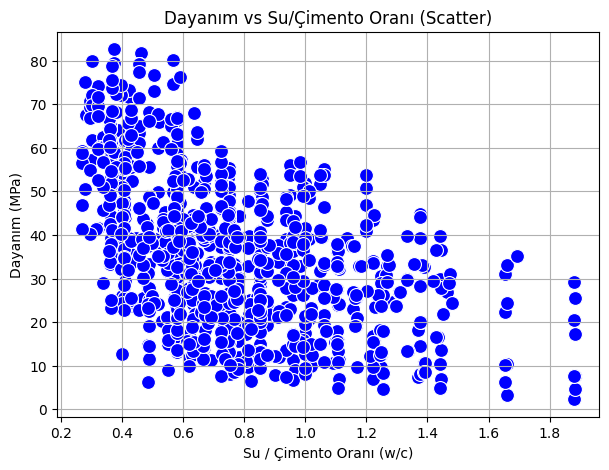

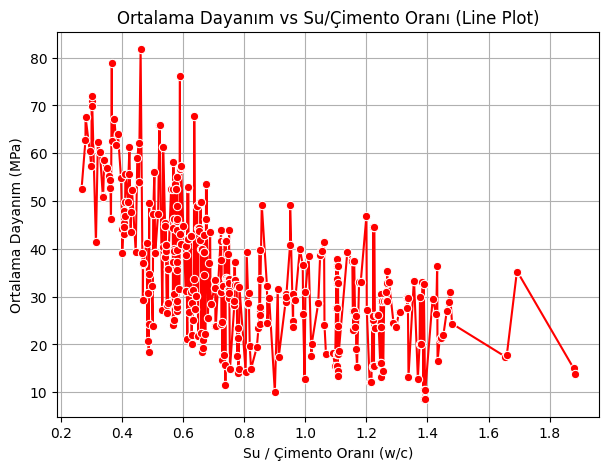

In [2]:
import pandas as pd

# CSV dosyasını oku
df = pd.read_csv("/content/concrete.csv")

# Su/Çimento oranını hesapla
df["w_c_ratio"] = df["water"] / df["cement"]

# Scatter ve line plot
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot
plt.figure(figsize=(7,5))
sns.scatterplot(x="w_c_ratio", y="strength", data=df, color="blue", s=100)
plt.xlabel("Su / Çimento Oranı (w/c)")
plt.ylabel("Dayanım (MPa)")
plt.title("Dayanım vs Su/Çimento Oranı (Scatter)")
plt.grid(True)
plt.show()

# Line plot: ortalama dayanım
w_c_mean = df.groupby("w_c_ratio")["strength"].mean().reset_index()

plt.figure(figsize=(7,5))
sns.lineplot(x="w_c_ratio", y="strength", data=w_c_mean, marker="o", color="red")
plt.xlabel("Su / Çimento Oranı (w/c)")
plt.ylabel("Ortalama Dayanım (MPa)")
plt.title("Ortalama Dayanım vs Su/Çimento Oranı (Line Plot)")
plt.grid(True)
plt.show()

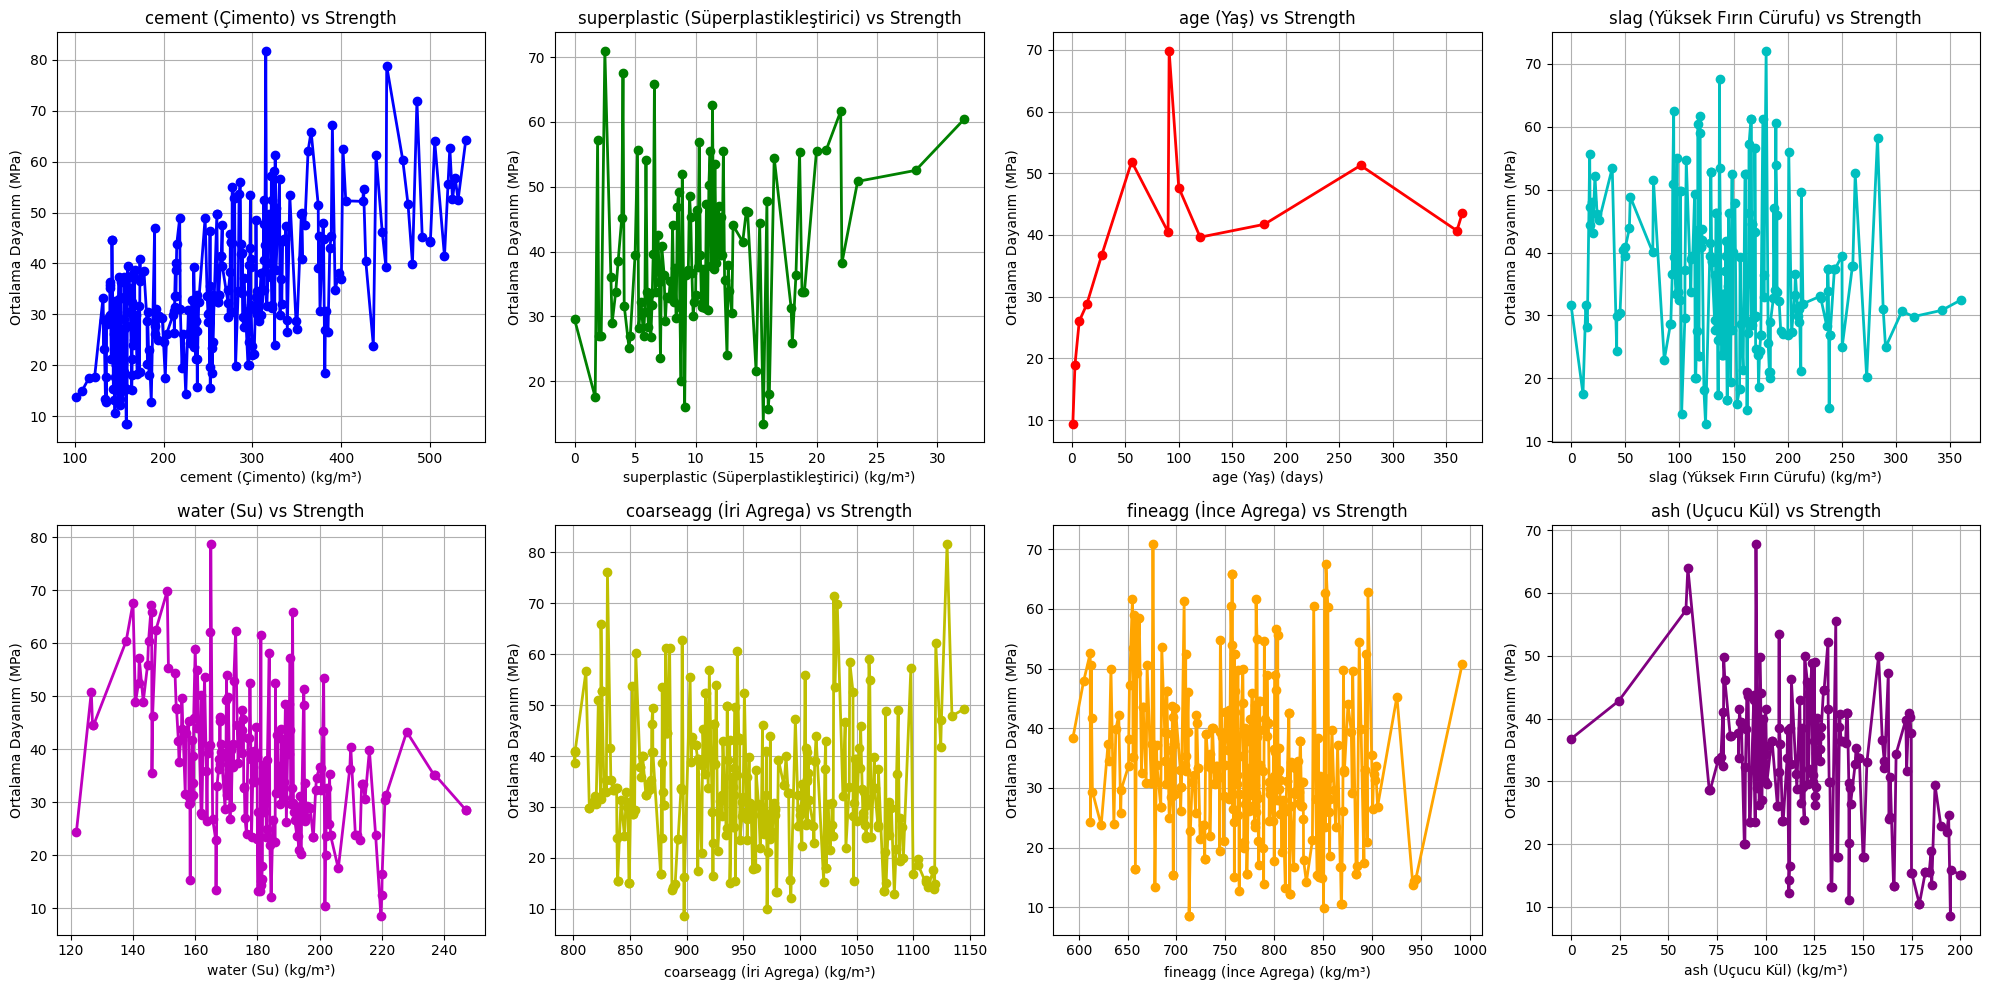

In [4]:
features = ['cement','superplastic','age','slag','water','coarseagg','fineagg','ash']
labels_tr = {
    'cement': 'cement (Çimento)',
    'superplastic': 'superplastic (Süperplastikleştirici)',
    'age': 'age (Yaş)',
    'slag': 'slag (Yüksek Fırın Cürufu)',
    'water': 'water (Su)',
    'coarseagg': 'coarseagg (İri Agrega)',
    'fineagg': 'fineagg (İnce Agrega)',
    'ash': 'ash (Uçucu Kül)'
}
colors = ['b','g','r','c','m','y','orange','purple']

plt.figure(figsize=(20,10))

for i, feature in enumerate(features):
    plt.subplot(2, 4, i+1)
    avg = df.groupby(feature)['strength'].mean().sort_index()
    plt.plot(avg.index, avg.values, color=colors[i], marker='o', linestyle='-', linewidth=2)

    # X ekseni etiketi
    if feature != 'age':
        plt.xlabel(f'{labels_tr[feature]} (kg/m³)')
    else:
        plt.xlabel(f'{labels_tr[feature]} (days)')

    # Y ekseni
    plt.ylabel('Ortalama Dayanım (MPa)')

    # Başlık
    plt.title(f'{labels_tr[feature]} vs Strength')
    plt.grid(True)

plt.tight_layout()

# Dosya olarak kaydet
plt.savefig("strength_vs_features_tr.jpg", dpi=300, bbox_inches='tight')
plt.show()

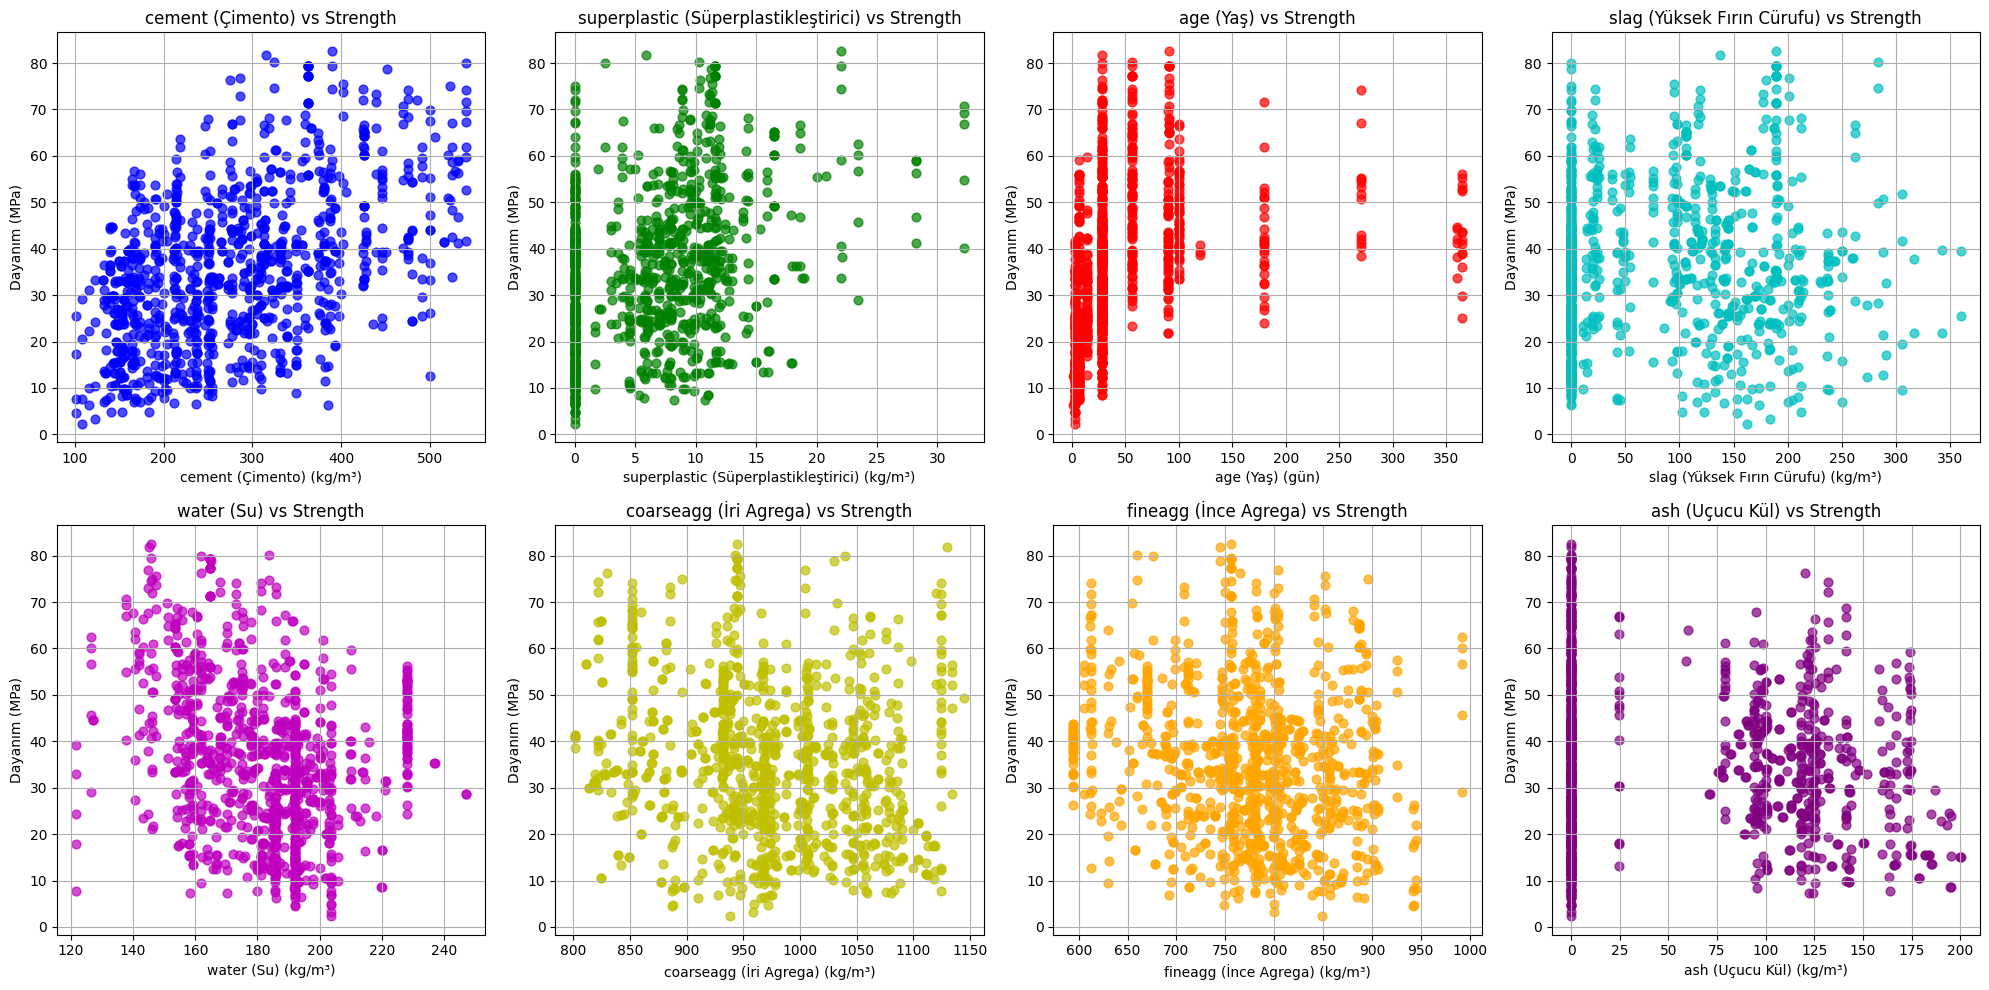

In [6]:
features = ['cement','superplastic','age','slag','water','coarseagg','fineagg','ash']
labels_tr = {
    'cement': 'cement (Çimento)',
    'superplastic': 'superplastic (Süperplastikleştirici)',
    'age': 'age (Yaş)',
    'slag': 'slag (Yüksek Fırın Cürufu)',
    'water': 'water (Su)',
    'coarseagg': 'coarseagg (İri Agrega)',
    'fineagg': 'fineagg (İnce Agrega)',
    'ash': 'ash (Uçucu Kül)'
}
colors = ['b','g','r','c','m','y','orange','purple']

plt.figure(figsize=(20,10))

for i, feature in enumerate(features):
    plt.subplot(2, 4, i+1)

    # Scatter plot
    plt.scatter(df[feature], df['strength'], color=colors[i], marker='o', s=40, alpha=0.7)

    # X ekseni
    if feature != 'age':
        plt.xlabel(f'{labels_tr[feature]} (kg/m³)')
    else:
        plt.xlabel(f'{labels_tr[feature]} (gün)')

    # Y ekseni
    plt.ylabel('Dayanım (MPa)')

    # Başlık
    plt.title(f'{labels_tr[feature]} vs Strength')
    plt.grid(True)

plt.tight_layout()

# Dosya olarak kaydet
plt.savefig("scatter_strength_vs_features_tr.jpg", dpi=300, bbox_inches='tight')
plt.show()

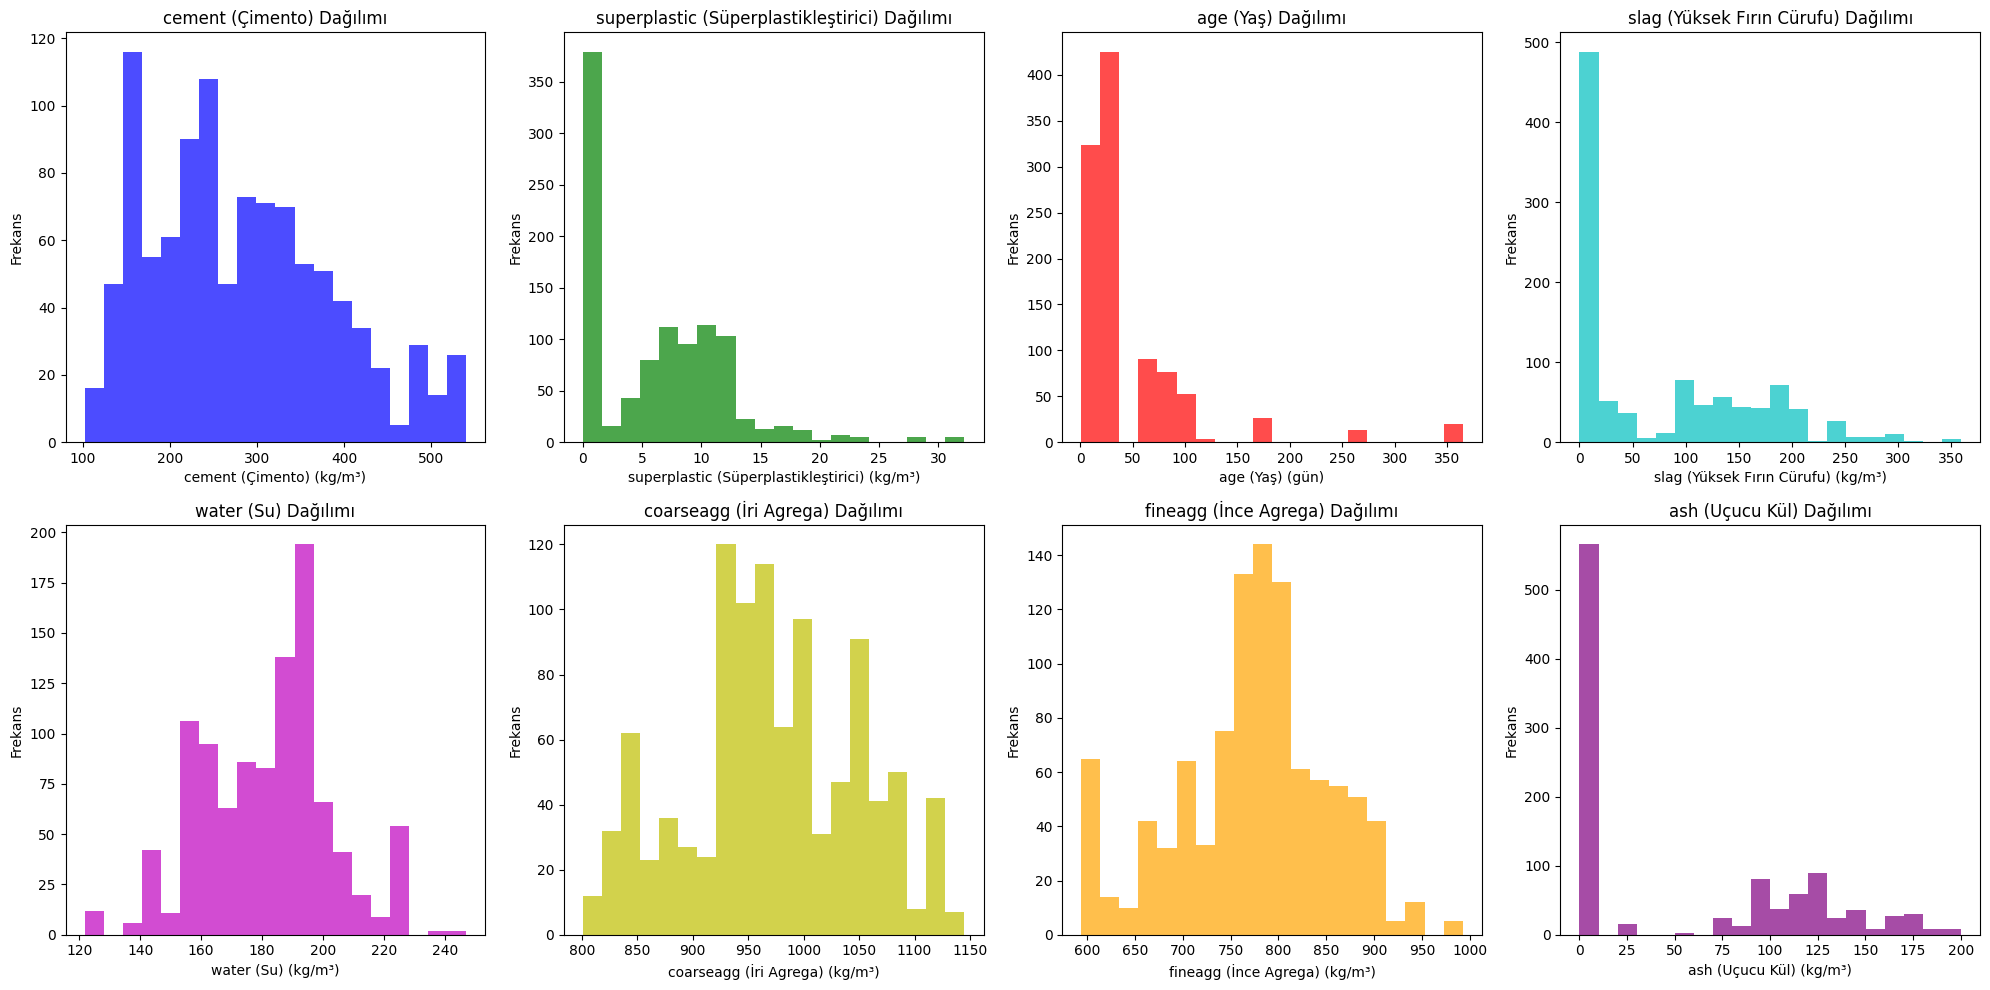

In [8]:
features = ['cement','superplastic','age','slag','water','coarseagg','fineagg','ash']
labels_tr = {
    'cement': 'cement (Çimento)',
    'superplastic': 'superplastic (Süperplastikleştirici)',
    'age': 'age (Yaş)',
    'slag': 'slag (Yüksek Fırın Cürufu)',
    'water': 'water (Su)',
    'coarseagg': 'coarseagg (İri Agrega)',
    'fineagg': 'fineagg (İnce Agrega)',
    'ash': 'ash (Uçucu Kül)'
}
colors = ['b','g','r','c','m','y','orange','purple']

plt.figure(figsize=(20,10))

for i, feature in enumerate(features):
    plt.subplot(2, 4, i+1)

    # Histogram
    plt.hist(df[feature], bins=20, color=colors[i], alpha=0.7)

    # X ekseni
    if feature != 'age':
        plt.xlabel(f'{labels_tr[feature]} (kg/m³)')
    else:
        plt.xlabel(f'{labels_tr[feature]} (gün)')

    # Y ekseni
    plt.ylabel('Frekans')

    # Başlık
    plt.title(f'{labels_tr[feature]} Dağılımı')

plt.tight_layout()

# Dosya olarak kaydet
plt.savefig("hist_features_tr.jpg", dpi=300, bbox_inches='tight')
plt.show()

<Figure size 1400x800 with 0 Axes>

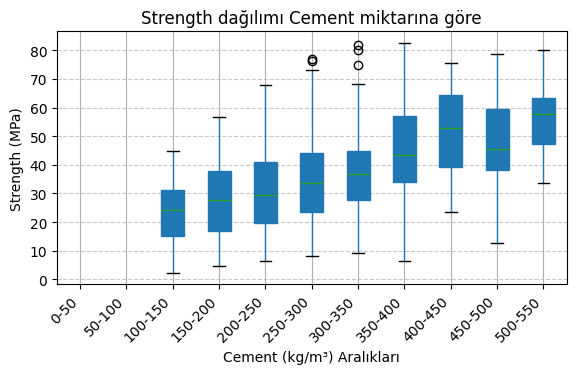

Her cement aralığındaki outlier sayıları:
0-50: 0
50-100: 0
100-150: 0
150-200: 0
200-250: 0
250-300: 2
300-350: 3
350-400: 0
400-450: 0
450-500: 0
500-550: 0


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Veri setini oku
df = pd.read_csv("/content/concrete.csv")

# Cement değerlerini 50 birimlik aralıklarla kategorize et
bins = np.arange(0, df['cement'].max() + 50, 50)
labels = [f"{int(bins[i])}-{int(bins[i+1])}" for i in range(len(bins)-1)]
df['cement_group'] = pd.cut(df['cement'], bins=bins, labels=labels, include_lowest=True)

# Outlier sayısını saklayacak sözlük
outlier_counts = {}

# Her cement grubunu işle
for group in df['cement_group'].cat.categories:
    group_data = df[df['cement_group'] == group]['strength']
    Q1 = group_data.quantile(0.25)
    Q3 = group_data.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    outlier_count = ((group_data < lower) | (group_data > upper)).sum()
    outlier_counts[group] = outlier_count

# Boxplot
plt.figure(figsize=(14,8))
df.boxplot(column='strength', by='cement_group', vert=True, patch_artist=True)

plt.title('Strength dağılımı Cement miktarına göre')
plt.suptitle('')  # otomatik başlığı kaldır
plt.xlabel('Cement (kg/m³) Aralıkları')
plt.ylabel('Strength (MPa)')

# X ekseni etiketlerini yatay yaz
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout(pad=3.0)
plt.show()

# Her aralıktaki outlier sayısını yazdır
print("Her cement aralığındaki outlier sayıları:")
for group, count in outlier_counts.items():
    print(f"{group}: {count}")

In [16]:
import pandas as pd
import numpy as np

# Cement değerlerini 50 birimlik aralıklarla kategorize et
bins = np.arange(0, df['cement'].max() + 50, 50)
labels = [f"{int(bins[i])}-{int(bins[i+1])}" for i in range(len(bins)-1)]
df['cement_group'] = pd.cut(df['cement'], bins=bins, labels=labels, include_lowest=True)

# Her cement grubu için outlier satırlarını sakla
outlier_data = {}

for group in df['cement_group'].cat.categories:
    group_df = df[df['cement_group'] == group]
    group_strength = group_df['strength']

    Q1 = group_strength.quantile(0.25)
    Q3 = group_strength.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR

    # Outlier olan satırları seç
    outliers = group_df[(group_strength < lower) | (group_strength > upper)]
    if not outliers.empty:
        outlier_data[group] = outliers

# Her cement aralığındaki outlier satırlarının ilk 5 satırını göster
for group, outliers in outlier_data.items():
    print(f"\nCement aralığı {group} - Outlier sayısı: {len(outliers)}")
    display(outliers.head())  # head ile sadece ilk birkaç satırı tablo olarak göster


Cement aralığı 250-300 - Outlier sayısı: 2


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,cement_group
337,286.3,200.9,0.0,144.7,11.2,1004.6,803.7,91,76.80,250-300
491,275.0,180.0,120.0,162.0,10.4,830.0,765.0,28,76.24,250-300



Cement aralığı 300-350 - Outlier sayısı: 3


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,cement_group
128,323.7,282.8,0.0,183.8,10.3,942.7,659.9,28,74.70,300-350
192,315.0,137.0,0.0,145.0,5.9,1130.0,745.0,28,81.75,300-350
1003,323.7,282.8,0.0,183.8,10.3,942.7,659.9,56,80.20,300-350


In [20]:
outlier_indexes = [337, 491, 128, 192, 1003]

# Orijinal veri setinden bu satırları çıkar
df_cleaned = df.drop(index=outlier_indexes)

print(f"Orijinal veri sayısı: {len(df)}")
print(f"Outlier çıkarıldıktan sonra: {len(df_cleaned)}")

Orijinal veri sayısı: 1030
Outlier çıkarıldıktan sonra: 1025


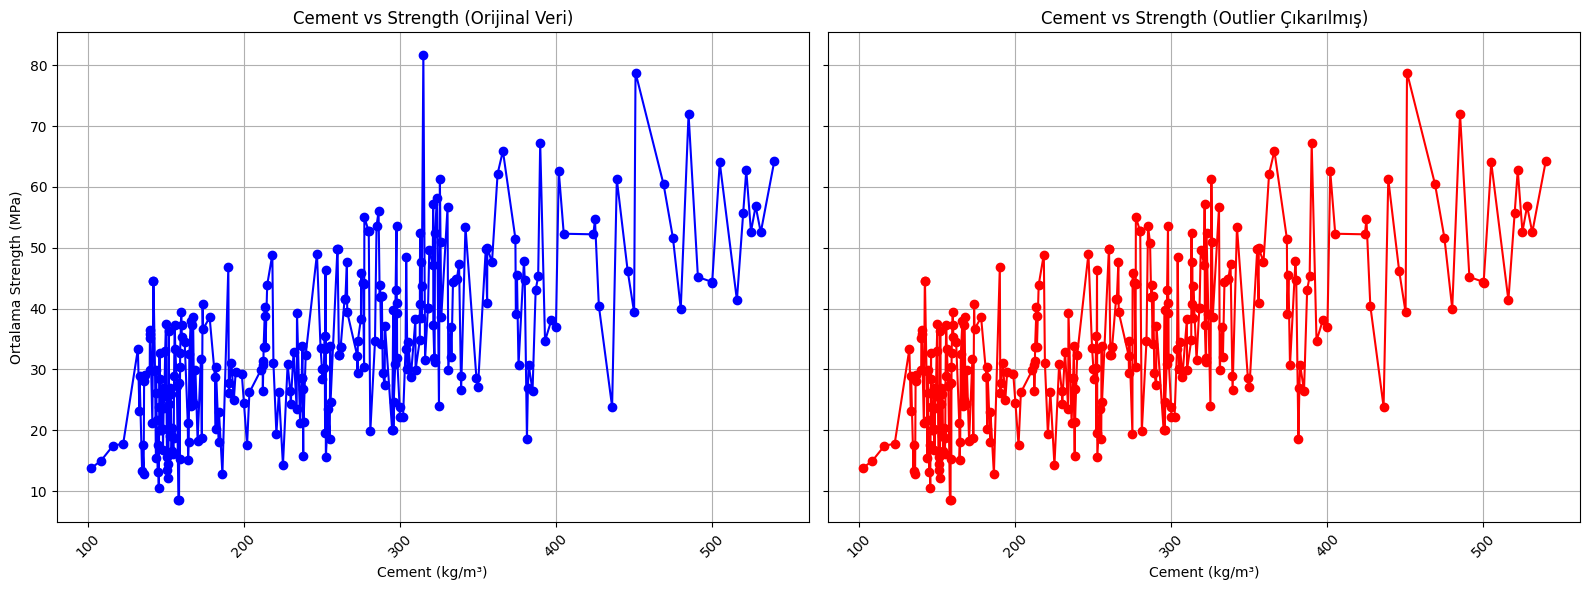

In [21]:
avg_original = df.groupby('cement')['strength'].mean().sort_index()
avg_cleaned = df_cleaned.groupby('cement')['strength'].mean().sort_index()

# Yan yana line plot
fig, axes = plt.subplots(1, 2, figsize=(16,6), sharey=True)

# 1️⃣ Sol: Orijinal veri
axes[0].plot(avg_original.index, avg_original.values, marker='o', linestyle='-', color='b')
axes[0].set_title('Cement vs Strength (Orijinal Veri)')
axes[0].set_xlabel('Cement (kg/m³)')
axes[0].set_ylabel('Ortalama Strength (MPa)')
axes[0].grid(True)
axes[0].tick_params(axis='x', rotation=45)

# 2️⃣ Sağ: Outlier çıkarılmış
axes[1].plot(avg_cleaned.index, avg_cleaned.values, marker='o', linestyle='-', color='r')
axes[1].set_title('Cement vs Strength (Outlier Çıkarılmış)')
axes[1].set_xlabel('Cement (kg/m³)')
axes[1].grid(True)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

## **Introduction to Colab and Python**

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/examples/blob/master/courses/udacity_intro_to_tensorflow_for_deep_learning/l01c01_introduction_to_colab_and_python.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/examples/blob/master/courses/udacity_intro_to_tensorflow_for_deep_learning/l01c01_introduction_to_colab_and_python.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

Welcome to this Colab where you will get a quick introduction to the Python programming language and the environment used for the course's exercises: Colab.

Colab is a Python development environment that runs in the browser using Google Cloud.

For example, to print "Hello World", just hover the mouse over [ ] and press the play button to the upper left. Or press shift-enter to execute.

In [ ]:
print("Hello World")

## Functions, Conditionals, and Iteration
Let's create a Python function, and call it from a loop.

In [ ]:
def HelloWorldXY(x, y):
  if (x < 10):
    print("Hello World, x was < 10")
  elif (x < 20):
    print("Hello World, x was >= 10 but < 20")
  else:
    print("Hello World, x was >= 20")
  return x + y

for i in range(8, 25, 5):  # i=8, 13, 18, 23 (start, stop, step)
  print("--- Now running with i: {}".format(i))
  r = HelloWorldXY(i,i)
  print("Result from HelloWorld: {}".format(r))

In [ ]:
print(HelloWorldXY(1,2))

Easy, right?

If you want a loop starting at 0 to 2 (exclusive) you could do any of the following

In [ ]:
print("Iterate over the items. `range(2)` is like a list [0,1].")
for i in range(2):
  print(i)

print("Iterate over an actual list.")
for i in [0,1]:
  print(i)

print("While works")
i = 0
while i < 2:
  print(i)
  i += 1

In [ ]:
print("Python supports standard key words like continue and break")
while True:
  print("Entered while")
  break

## Numpy and lists
Python has lists built into the language.
However, we will use a library called numpy for this.
Numpy gives you lots of support functions that are useful when doing Machine Learning.

Here, you will also see an import statement. This statement makes the entire numpy package available and we can access those symbols using the abbreviated 'np' syntax.

In [ ]:
import numpy as np  # Make numpy available using np.

# Create a numpy array, and append an element
a = np.array(["Hello", "World"])
a = np.append(a, "!")
print("Current array: {}".format(a))
print("Printing each element")
for i in a:
  print(i)

print("\nPrinting each element and their index")
for i,e in enumerate(a):
  print("Index: {}, was: {}".format(i, e))

In [ ]:
print("\nShowing some basic math on arrays")
b = np.array([0,1,4,3,2])
print("Max: {}".format(np.max(b)))
print("Average: {}".format(np.average(b)))
print("Max index: {}".format(np.argmax(b)))

In [ ]:
print("\nYou can print the type of anything")
print("Type of b: {}, type of b[0]: {}".format(type(b), type(b[0])))

In [ ]:
print("\nUse numpy to create a [3,3] dimension array with random number")
c = np.random.rand(3, 3)
print(c)

In [ ]:
print("\nYou can print the dimensions of arrays")
print("Shape of a: {}".format(a.shape))
print("Shape of b: {}".format(b.shape))
print("Shape of c: {}".format(c.shape))
print("...Observe, Python uses both [0,1,2] and (0,1,2) to specify lists")

## Colab Specifics

Colab is a virtual machine you can access directly. To run commands at the VM's terminal, prefix the line with an exclamation point (!).


In [ ]:
print("\nDoing $ls on filesystem")
!ls -l
!pwd

In [ ]:
print("Install numpy")  # Just for test, numpy is actually preinstalled in all Colab instances
!pip install numpy

**Exercise**

Create a code cell underneath this text cell and add code to:


*   List the path of the current directory (pwd)
* Go to / (cd) and list the content (ls -l)

In [ ]:
!pwd
!cd /
!ls -l
print("Hello")

All usage of Colab in this course is completely free or charge. Even GPU usage is provided free of charge for some hours of usage every day.

**Using GPUs**
* Many of the exercises in the course executes more quickly by using GPU runtime: Runtime | Change runtime type | Hardware accelerator | GPU

**Some final words on Colab**
*   You execute each cell in order, you can edit & re-execute cells if you want
*   Sometimes, this could have unintended consequences. For example, if you add a dimension to an array and execute the cell multiple times, then the cells after may not work. If you encounter problem reset your environment:
  *   Runtime -> Restart runtime... Resets your Python shell
  *   Runtime -> Restart all runtimes... Will reset the Colab image, and get you back to a 100% clean environment
* You can also clear the output in the Colab by doing: Edit -> Clear all outputs
* Colabs in this course are loaded from GitHub. Save to your Google Drive if you want a copy with your code/output: File -> Save a copy in Drive...

**Learn More**
*   Check out [this](https://www.youtube.com/watch?v=inN8seMm7UI&list=PLQY2H8rRoyvwLbzbnKJ59NkZvQAW9wLbx&index=3) episode of #CodingTensorFlow, and don't forget to subscribe to the YouTube channel ;)
